In [19]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel("preprocessed.xlsx")

In [3]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.drop(['HaveWorkedWith'], axis=1, inplace=True)
print(df.columns)

Index(['Age', 'Accessibility', 'EdLevel', 'Employment', 'MentalHealth',
       'MainBranch', 'YearsCode', 'YearsCodePro', 'PreviousSalary',
       'ComputerSkills', 'Employed'],
      dtype='object')


In [5]:
def split(df, train_split=0.8, val_split=0.1, test_split=0.1):
    df_sample = df.sample(frac=1, random_state=12)
    indices_or_sections = [int(train_split * len(df)), int((1 - val_split - test_split) * len(df))]
    train, val, test = np.split(df_sample, indices_or_sections)
    return train, val, test
train, val, test=split(df, 0.9,0,0.1)
train_x=train.drop(['Employed'], axis=1)
train_y=train['Employed']

/home/abayup14/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [20]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(2, activation='linear')
])

In [21]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
    )
history=model.fit(train_x, train_y,
                  validation_split = 0.1, 
                  epochs=50,
                  verbose=2
                 )

Epoch 1/50
1860/1860 - 7s - loss: 185.6106 - accuracy: 0.5171 - val_loss: 96.4642 - val_accuracy: 0.4673 - 7s/epoch - 4ms/step
Epoch 2/50
1860/1860 - 7s - loss: 31.2324 - accuracy: 0.5451 - val_loss: 38.6145 - val_accuracy: 0.5389 - 7s/epoch - 4ms/step
Epoch 3/50
1860/1860 - 6s - loss: 28.1617 - accuracy: 0.5585 - val_loss: 111.3829 - val_accuracy: 0.5390 - 6s/epoch - 3ms/step
Epoch 4/50
1860/1860 - 6s - loss: 29.9495 - accuracy: 0.5719 - val_loss: 22.4332 - val_accuracy: 0.5490 - 6s/epoch - 3ms/step
Epoch 5/50
1860/1860 - 6s - loss: 24.0591 - accuracy: 0.5908 - val_loss: 45.0712 - val_accuracy: 0.5169 - 6s/epoch - 3ms/step
Epoch 6/50
1860/1860 - 6s - loss: 20.4607 - accuracy: 0.6017 - val_loss: 43.5231 - val_accuracy: 0.5221 - 6s/epoch - 3ms/step
Epoch 7/50
1860/1860 - 6s - loss: 19.0391 - accuracy: 0.6108 - val_loss: 4.2605 - val_accuracy: 0.6878 - 6s/epoch - 3ms/step
Epoch 8/50
1860/1860 - 6s - loss: 19.8202 - accuracy: 0.6175 - val_loss: 28.5839 - val_accuracy: 0.5585 - 6s/epoch - 

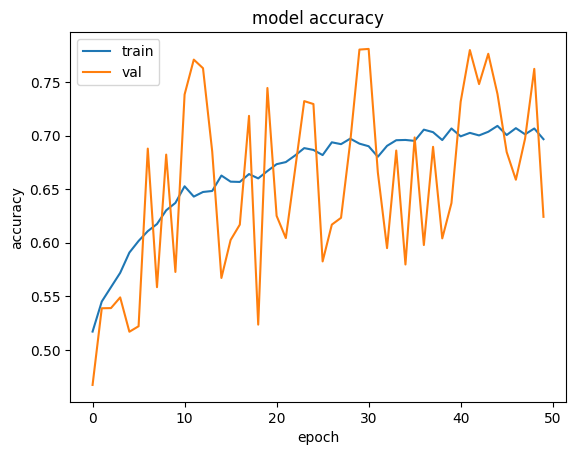

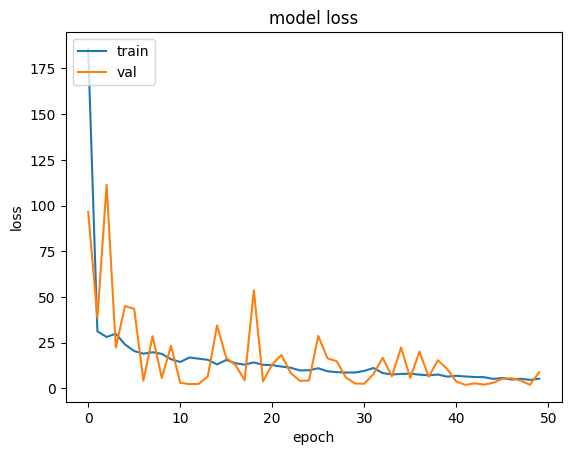

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
print()
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["train", "val"], loc="upper left")
plt.show()

In [23]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 12)                132       
                                                                 
 dense_10 (Dense)            (None, 10)                130       
                                                                 
 dense_11 (Dense)            (None, 2)                 22        
                                                                 
Total params: 284 (1.11 KB)
Trainable params: 284 (1.11 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
